In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from data_simulation import get_data
from utils import get_metrics


In [13]:
version_i = 0


In [14]:
# set seed
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
n_train = 50
n_test = 10000
X_train, Y_train, X_train_orig = get_data(d_x=d_x, n_data=n_train)
X_test, Y_test, X_test_orig = get_data(d_x=d_x, n_data=n_test)


# likelihood tempering

In [15]:
tempering = "likelihood"


In [16]:
lambs = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


In [17]:
var_prior = 1.0
var_likelihood = 0.01
result = get_metrics(
    var_prior,
    var_likelihood,
    X_train,
    Y_train,
    X_train_orig,
    X_test,
    Y_test,
    X_test_orig,
    lambs,
    gammas=None,
)


0.001
0.01
0.1
1.0
10.0
100.0
1000.0


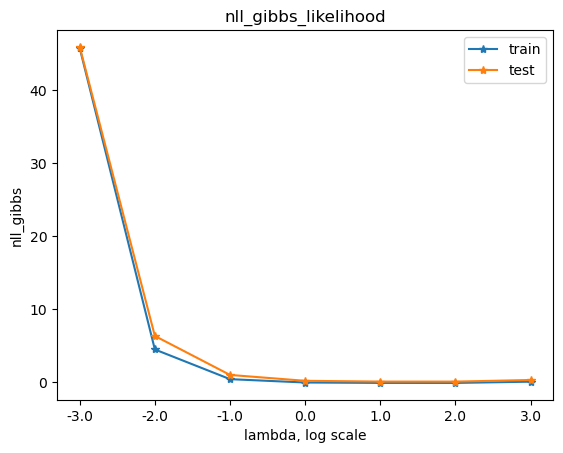

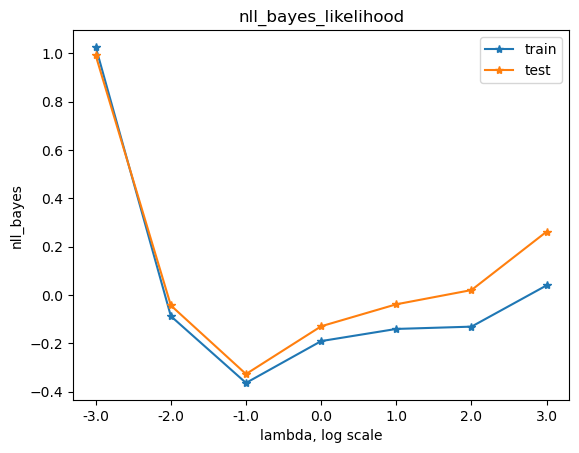

In [18]:
name_metrics = ["nll_gibbs", "nll_bayes"]  # ,"mse_gibbs","mse_bayes"]
for name_metric in name_metrics:
    plt.figure()
    save_name = f"{name_metric}_{tempering}"
    plt.title(save_name)
    plt.plot(
        np.arange(0, len(lambs), 1),
        result[f"{name_metric}_train"],
        marker="*",
        label="train",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result[f"{name_metric}_test"],
        marker="*",
        label="test",
    )
    # plt.plot(np.arange(0,len(lambs),1),nll_gibbs_test_1, marker="*", label=prior_scale_1)

    plt.xticks(np.arange(0, len(lambs), 1), np.log10(lambs))
    # plt.legend()
    if tempering == "likelihood":
        plt.xlabel("lambda, log scale")
    if tempering == "prior":
        plt.xlabel("gamma, log scale")
    plt.ylabel(name_metric)
    plt.legend()
    plt.savefig(f"./{save_name}.png", dpi=300)
    plt.show()


# prior tempering

In [19]:
tempering = "prior"


In [20]:
gammas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


In [21]:
var_prior = 1.0
var_likelihood = 0.01
result = get_metrics(
    var_prior,
    var_likelihood,
    X_train,
    Y_train,
    X_train_orig,
    X_test,
    Y_test,
    X_test_orig,
    lambs=None,
    gammas=gammas,
)


0.001
0.01
0.1
1.0
10.0
100.0
1000.0


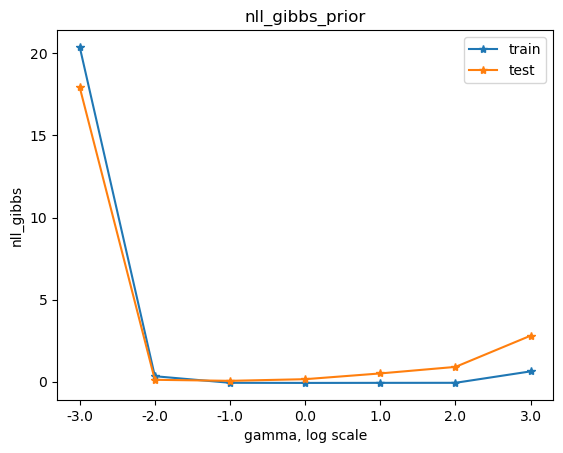

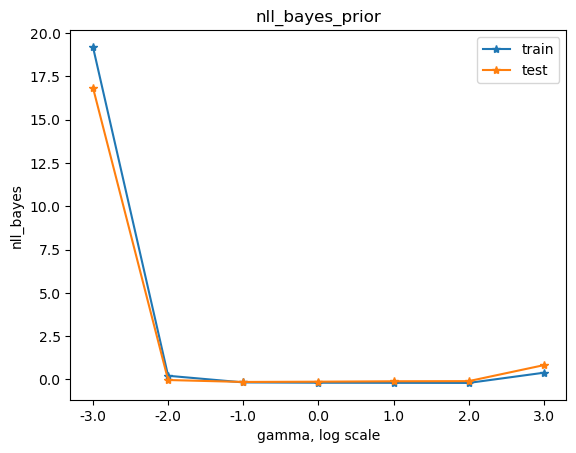

In [22]:
name_metrics = ["nll_gibbs", "nll_bayes"]  # ,"mse_gibbs","mse_bayes"]
for name_metric in name_metrics:
    plt.figure()
    save_name = f"{name_metric}_{tempering}"
    plt.title(save_name)
    plt.plot(
        np.arange(0, len(gammas), 1),
        result[f"{name_metric}_train"],
        marker="*",
        label="train",
    )
    plt.plot(
        np.arange(0, len(gammas), 1),
        result[f"{name_metric}_test"],
        marker="*",
        label="test",
    )
    # plt.plot(np.arange(0,len(lambs),1),nll_gibbs_test_1, marker="*", label=prior_scale_1)

    plt.xticks(np.arange(0, len(gammas), 1), np.log10(gammas))
    # plt.legend()
    if tempering == "likelihood":
        plt.xlabel("lambda, log scale")
    if tempering == "prior":
        plt.xlabel("gamma, log scale")
    plt.ylabel(name_metric)
    plt.legend()
    plt.savefig(f"./{save_name}.png", dpi=300)
    plt.show()
